# 신경망

## 계단 함수 구현하기

입력이 0이 넘으면 1을, 그 외에는 0을 출력

아래 블럭에 있는 사용자 함수 step_function_float에서 x는 실수(부동소수점)만 받아들임.
즉, 실수는 되지만 넘파이 배열을 인수로 넣을 수는 없음.
예를 들어 step_function_float(3.0)은 되지만, step_function_float(np.array([1.0, 2.0]))은 안됨.

In [3]:
def step_function_float(x):
    if x > 0:
        return 1

    else:
        return 0

넘파이 배열도 지원하도록 수정하기 위해서는 step_function_tric과 같이 코딩을 하면 됨.
넘파이의 편리한 트릭을 사용하여 수정하였음.

In [4]:
def step_function_tric(x):
    y = x > 0
    return y.astype(np.int)

아래 블록처럼 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성됨.
x의 원소 각각이 0보다 크면 True로, 이하면 False로 변환한 새로운 배열 y가 생성됨.

In [5]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x) 
print()

y = x > 0
print(y)

[-1.  1.  2.]

[False  True  True]


y는 bool 배열이다.
그러나 우리가 원하는 계단 함수는 0이나 1의 'int형'을 출력하는 함수이다. 따라서 배열 y의 원소를 bool에서 int형으로 바꿀 필요성이 있다.

넘파이 배열의 자료형을 변환할 때는 astype() 메소드를 이용한다.
또한 파이썬에서는 bool을 int로 변환하면 True는 1로, False는 0으로 변환된다.

이상이 계단 함수 구현에서 사용한 넘파이의 '트릭'이었다.

In [8]:
y = y.astype(np.int32)
y

array([0, 1, 1])

### 계단 함수의 그래프

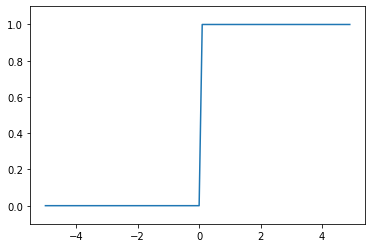

In [10]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

## 시그모이드 함수 구현하기

np.exp(-x)는 exp(-x) 수식에 해당.

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid(x)가 제대로 처리하는지 확인해보기.

이 함수가 넘파이 배열도 처리할 수 있는 이유는 넘파이의 브로드캐스트에 있음.
브로드캐스트 기능이란 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것.

In [12]:
x = np.array([-1.0, 1.0, 2.0])

print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


아래 예에서는 스칼라값 1.0과 넘파이 배열 사이에서 수치 연산(+와 /)을 해보았음.
결과적으로 스칼라값과 넘파이 배열의 각 원소 사이에서 연산이 이뤄지고, 연산 겨려과가 넘파이 배열로 출력되었음.

앞에서 구현한 sigmoid 함수에서도 np.exp(-x)가 넘파이 배열을 반환하기 때문에 1 / (1 + np.exp(-x))도 넘파이 배열의 각 원소에 연산을 수행한 결과를 내어줌.

In [13]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print()

print(1.0 / t)

[2. 3. 4.]

[1.         0.5        0.33333333]


시그모이드 함수 그려보기

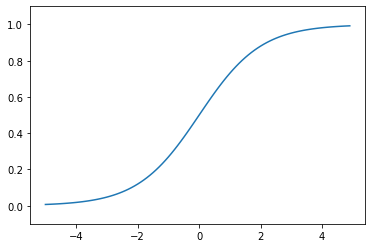

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

## ReLU 함수
최근 신경만 분야에서는 ReLU 함수를 주로 이용하고 있음.


ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수임.


간단한 ReLU 함수의 코드는 다음과 같음.
여기에서는 넘파이의 maximum 함수를 사용하였음. maximum은 두 입력 중 큰 값을 선택해 반환하는 함수임.


이번 신경망 단원에서는 앞으로 시그모이드 함수를 활성화 함수로 사용하지만, 이 책 후반부에서는 주로 ReLU 함수를 사용함.

In [15]:
def relu(x):
    return np.maximum(0, x)

## 다차원 배열의 계산

### 다차원 배열

넘파이를 사용해서 다차원 배열을 작성하기.

1) 1차원 배열

In [16]:
import numpy as np

A = np.array([1, 2, 3, 4])

print(A)
print(np.ndim(A)) # ndim : 배열 차원 수 파악 메소드
print(A.shape) # 배열의 형상 파악, 반환은 튜플 형식
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


2) 2차원 배열

In [17]:
B = np.array([[1, 2], [3, 4], [5, 6]])

print(B)
print()

print(np.ndim(B))
print()

print(B.shape)

[[1 2]
 [3 4]
 [5 6]]

2

(3, 2)


### 행렬의 곱

dot() : 행렬의 곱 메소드

참고로, np.dot()는 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산함.
또한, 주의할 점은 np.dot(A, B)와 np.dot(B, A)는 다른 값이 될 수 있다는 점임.
+나 * 등의 일반적인 연산과 달리 행렬의 곱에서는 피연산자의 순서가 다르면 결과도 달라짐.

In [18]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)
print()

B = np.array([[5, 6], [7, 8]])
print(B.shape)
print()

print(np.dot(A, B)) # dot : 행렬의 곱 메소드

(2, 2)

(2, 2)

[[19 22]
 [43 50]]


위 행렬의 곱은 2 * 2, 즉 형상이 같은 행렬을 곱하였으나, 형상이 다른 행렬의 곱도 마찬가지의 방법으로 계산할 수 있음.
예를 들어 2 * 3 행렬과 3 * 2 행렬의 곱을 구현하면 다음 모습과 같음.

In [19]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape); print();

B = np.array([7, 8])
print(B.shape); print();

print(np.dot(A, B))

(3, 2)

(2,)

[23 53 83]


## 3층 신경망 구현하기

### 각 층의 신호 전달 구현하기

In [20]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape); print();
print(X.shape); print();
print(B1.shape); print();

A1 = np.dot(X, W1) + B1

(2, 3)

(2,)

(3,)



### 입력층에서 1층으로의 신호 전달

In [21]:
Z1 = sigmoid(A1)

print(A1); print();
print(Z1)

[0.3 0.7 1.1]

[0.57444252 0.66818777 0.75026011]


### 1층에서 2층으로의 신호 전달

In [23]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape); print();
print(W2.shape); print();
print(B2.shape); print();

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)

(3, 2)

(2,)



### 2층에서 출력층으로의 신호 전달

In [24]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

### 구현 정리

In [25]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.4], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31442506 0.69147506]


## 출력층 설계하기

### 항등 함수와 소프트맥스 함수 구현하기

소프트맥스 함수의 결과를 하나씩 확인해보기

In [26]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a); print();

sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a); print();

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]

74.1221542101633

[0.01821127 0.24519181 0.73659691]


소프트맥스를 파이썬 함수로 정의하기

In [27]:
def sotfmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 소프트맥스 함수 구현 시 주의점

In [29]:
a = np.array([1010, 1000, 990])

print(np.exp(a) / np.sum(np.exp(a))) # 소프트맥스 함수의 계산
# 모두 nan이 출력됨. 참고로 nan은 not a number의 약자임
print() 

c = np.max(a) # c = 1010(최댓값)
print(a - c); print();

print(np.exp(a -  c) / np.sum(np.exp(a - c)))

[nan nan nan]

[  0 -10 -20]

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


C:\Users\park_\AppData\Local\Temp/ipykernel_17020/3515230115.py:3: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a))) # 소프트맥스 함수의 계산
C:\Users\park_\AppData\Local\Temp/ipykernel_17020/3515230115.py:3: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(a) / np.sum(np.exp(a))) # 소프트맥스 함수의 계산


소프트맥스 함수의 특징
소프트맥스 함수의 출력은 0에서 1.0 사이의 실수이다.
또한 소프트맥스 함수 출력의 총합은 1이다.
출력 총합이 1이 된다는 점은 소프트맥스 함수의 중요한 성질이다.
이 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.
즉, 소프트맥스 함수를 이용함으로써 문제를 확률적(통계적)으로 대응할 수 있게 되는 것이다.

주의할 점으로, 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다는 것이다. 이는 지수 함수 y = exp(x)가 단조 증가하기 때문이다.

## 손글씨 숫자 인식

### MNIST 데이터셋
MNIST 데이터셋은 0~9까지의 숫자 이미지로 구성됨.
훈련 이미지가 60000장, 시험 이미지가 10000장 준비되어 있음.
MNIST의 이미지 데이터는 28 * 28 크기의 회색조 이미지(1채널)이며, 각 픽셀은 0에서 255까지의 값을 취한다.

참고로 여기 학습 관련 책 코드는 조금 애매모호한 부분이 있으므로 "https://velog.io/@tmddn0311/mnist-classification"를 참고하여 MNIST 학습을 진행한다.

In [32]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

mnist.load_data() 함수는 읽은 MNIST 데이터를 "(훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)" 형식으로 반환한다.

In [33]:
# 데이터 불러오기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [34]:
# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


인수로는 normalize, flatten, one_hot_label 세 가지를 설정할 수 있으며, 세 인수 모두 bool 값이다.

첫 번째 인수인 nomalize는 입력 이미지의 픽셀값을 0.0 ~ 1.0 사이의 값으로 정규화할지를 정한다.
False로 설정하면 입력 이미지의 픽셀은 원래 값 그대로 0~255 사이의 값을 유지한다.

두 번째 인수인 flatten은 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정한다.
False로 설정하면 입력 이미지를 1 * 28 * 28의 3차원 배열로, True로 설정하면 784개의 원소로 이뤄진 1차원 배열로 저장한다.

세 번째 인수인 one_hot+label은 레이블을 원-핫 인코딩 형태로 저장할지를 정한다.
원-핫 인코딩이란, 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 정답을 뜻하는 원소만 1이고(hot)하고 나머지는 모두 0인 배열이다.
one_hot_label이 False이면 '7'이나 '2'와 같이 숫자 형태의 레이블을 저장하고, True일 때는 레이블을 원-핫 인코딩하여 저장한다.

In [63]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img) # 이것은 이미지 파일이 화면이 뜨게 됨

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

5
(784,)
(28, 28)


### 신경망의 추론 처리
이 신경망은 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성한다. 입령층 뉴런이 7874개인 이유는 이미지 크기가 28 * 28 = 784이기 때문이고, 출력층 뉴런이 10개인 이유는 이 문제가 0~9까지의 숫자를 구분하는 문제이기 때문이다.

한편, 은닉층은 총 두 개로, 첫 번째 은닉층에는 50개의 뉴런을, 두 번째 은닉층에는 100개의 뉴런을 배치할 것이다. 여기서 50과 100은 임의로 정한 값이다.

차례대로 작업을 처리해줄 세 함수인 get_data(), init_network(), predice()를 정의한다.

In [66]:
import sys, os
import pickle
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a

    return y

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, 
                                                      flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1)+b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3)+b3
    z3 = softmax(a3)
    return y

init_network()에서는 pickle 파일인 sample_weight.pkl에 저장된 '학습된 가중치 매개변수'를 읽는다.
이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있다.

아래 블록 코드는 세 함수를 사용해 신경망에 의한 추론을 수행해보고, 정확도도 평가해본다.

In [67]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.1032


### 배치 처리
신경망 각 층의 가중치 형상 출력해보기


아래 코드 블록의 결과를 통해 다차원 배열의 대응하는 차원의 원소 수가 일치함을 확인할 수 있다.

In [54]:
x,  _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


### 배치 처리 구현하기

In [69]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y) #확률이 가장 높은 원소의 인덱스를 얻는다.
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.1032
